# Machine Learning - Project 1 - Group 12
#### Rachana RaviKumar - rxr190009
#### Srilekha Boddu - sxb190060


# Classifcation

### Estimation of obesity levels based on eating habits and physical condition 
Data source:https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

# Data Description:

- Frequent consumption of high caloric food (FAVC), 
- Frequency of consumption of vegetables (FCVC), 
- Number of main meals (NCP), 
- Consumption of food between meals (CAEC),
- Whether the person smokes or not (SMOKE),
- Consumption of water daily (CH20), 
- Consumption of alcohol (CALC).

The attributes related with the physical condition are:
- Calories consumption monitoring (SCC), 
- Physical activity frequency (FAF), 
- Time using technology devices (TUE), 
- Transportation used (MTRANS),
- other variables obtained were: Gender, Age, Height, Weight and family_history_with_overweight. 
- Target variable: NObesity

The original dataset had no null values, therefore we inserted 5-10% of Null values in several columns.

### Project Objective
The objective of the project is to classify the obesity level: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Obesity.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.shape

(2111, 17)

In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2101.000000,1982.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.687674,2.008120,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.777083,0.613392,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.667711,1.603680,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.480485,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2107 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2101 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            1982 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.isnull().sum().sort_values(ascending = False)

CH2O                              129
MTRANS                             36
CALC                               13
NCP                                10
family_history_with_overweight      4
NObesity                            0
FAVC                                0
Age                                 0
Height                              0
Weight                              0
CAEC                                0
FCVC                                0
SMOKE                               0
SCC                                 0
FAF                                 0
TUE                                 0
Gender                              0
dtype: int64

In [7]:
# Percentage of missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / len(df)*100).sort_values(ascending = False)
missingData = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])
missingData

,Total,Percent
CH2O,129,6.110848
MTRANS,36,1.705353
CALC,13,0.615822
NCP,10,0.473709
family_history_with_overweight,4,0.189484
NObesity,0,0.000000
FAVC,0,0.000000
Age,0,0.000000
Height,0,0.000000
Weight,0,0.000000


# Exploratory Data Analysis

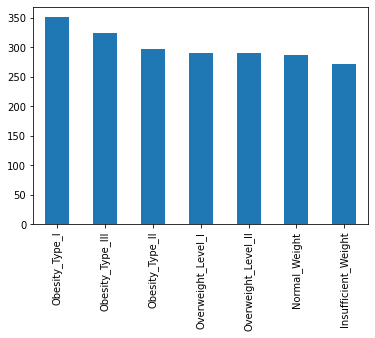

In [8]:
#target : NObesity
df['NObesity'].value_counts().plot(kind = 'bar')

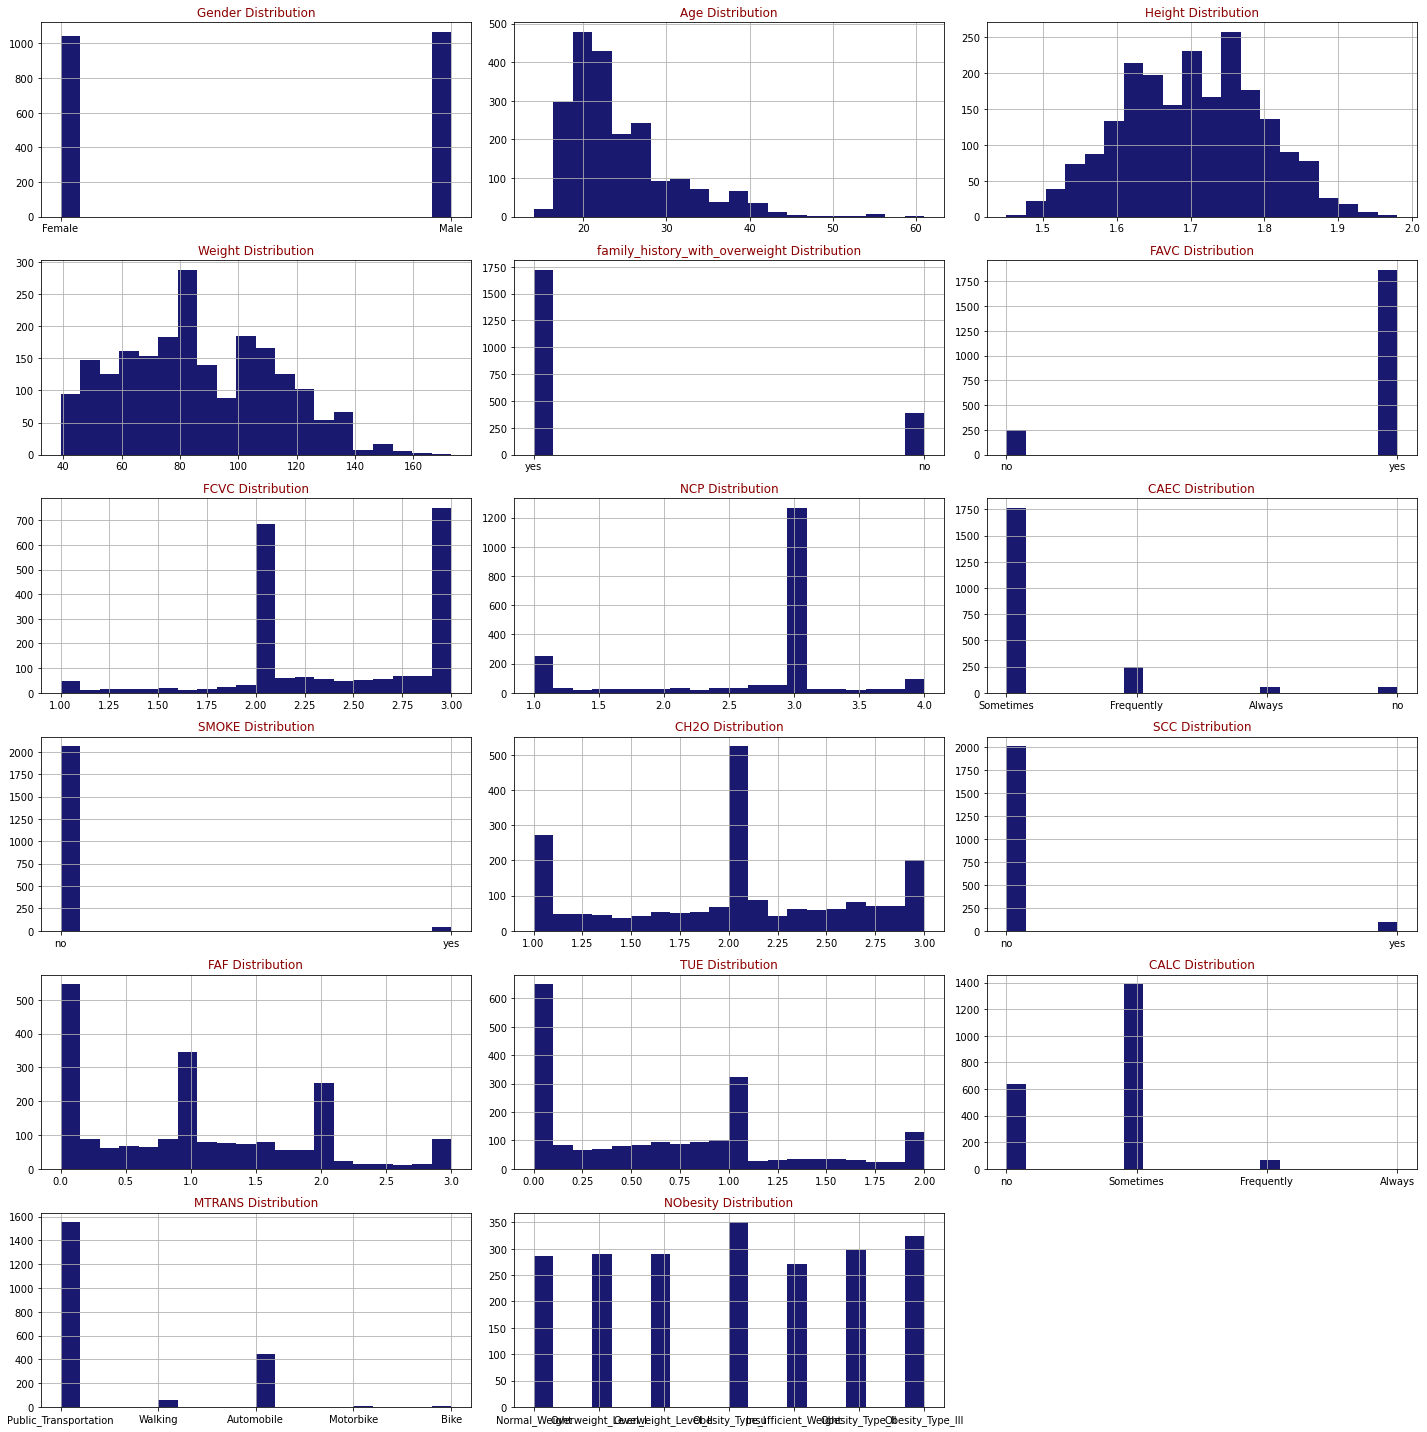

In [9]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

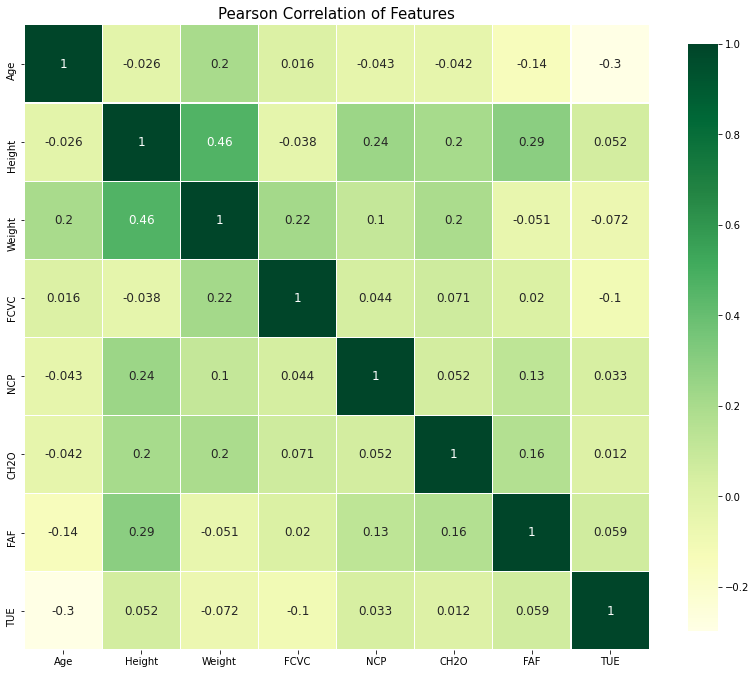

In [10]:
def correlation_heatmap(dataframe):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        dataframe.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

# Data Transformation

- Categorical columns: family_history_with_overweight,CALC and MTRANS have missing values in their columns therefore we replace the missing values with mode of the respective columns.
- Column CH2O has missing values therefore we replace the missing values with mean as the distribution is normal.
- Column NCP has missing values therefore we replace the missing values with median as the distribution is skewed.
- For columns Gender, family_history_with_overweight, FAVC, SMOKE, SCC and NObesity  we will use mapping technique.
- For columns CAEC, CALC and MTRANS we will use one hot encoding.

In [11]:
df['family_history_with_overweight'].fillna(df['family_history_with_overweight'].mode()[0], inplace=True)
df['CALC'].fillna(df['CALC'].mode()[0], inplace=True)
df['MTRANS'].fillna(df['MTRANS'].mode()[0], inplace=True)

In [12]:
df['CH2O'] = df['CH2O'].fillna((df['CH2O'].mean()))

In [13]:
df['NCP'] = df['NCP'].fillna((df['NCP'].median()))

In [14]:
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df['FAVC'] = df['FAVC'].map( {'yes': 0, 'no': 1} ).astype(int)
df['SMOKE'] = df['SMOKE'].map( {'yes': 0, 'no': 1} ).astype(int)
df['SCC'] = df['SCC'].map( {'yes': 0, 'no': 1} ).astype(int)
df['family_history_with_overweight'] = df['family_history_with_overweight'].map( {'yes': 0, 'no': 1} ).astype(int)
df['NObesity'] = df['NObesity'].map( {'Insufficient_Weight': 0, 'Normal_Weight': 1,'Obesity_Type_I': 2, 'Obesity_Type_II': 3,'Obesity_Type_III': 4, 'Overweight_Level_I': 5,'Overweight_Level_II': 6} ).astype(int)

In [15]:
cols = pd.get_dummies(df['CAEC'], prefix= 'CAEC')
df[cols.columns] = cols
df.drop('CAEC', axis = 1, inplace = True)

In [16]:
cols = pd.get_dummies(df['CALC'], prefix= 'CALC')
df[cols.columns] = cols
df.drop('CALC', axis = 1, inplace = True)

In [17]:
cols = pd.get_dummies(df['MTRANS'], prefix= 'MTRANS')
df[cols.columns] = cols
df.drop('MTRANS', axis = 1, inplace = True)

# Final dataset after data preparation


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SMOKE                           2111 non-null   int32  
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   int32  
 11  FAF                             2111 non-null   float64
 12  TUE                             21

In [19]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,0,1,2.0,3.0,1,2.0,...,0,0,0,0,1,0,0,0,1,0
1,0,21.0,1.52,56.0,0,1,3.0,3.0,0,3.0,...,0,0,0,1,0,0,0,0,1,0
2,1,23.0,1.80,77.0,0,1,2.0,3.0,1,2.0,...,0,0,1,0,0,0,0,0,1,0
3,1,27.0,1.80,87.0,1,1,3.0,3.0,1,2.0,...,0,0,1,0,0,0,0,0,0,1
4,1,22.0,1.78,89.8,1,1,2.0,1.0,1,2.0,...,0,0,0,1,0,0,0,0,1,0


# Splitting the data and scaling


In [20]:
from sklearn.model_selection import train_test_split

X= df.drop(['NObesity'], axis=1)
y = df['NObesity']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [21]:
#The data is not normally distributed within each feature therefore it is good to use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [22]:
# importing libraries 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

## Classification Models 

The following classifiers are implemented in the next part:
- KNN classification
- Logistic Regression
- Linear Support Vector Machine
- Kerenilzed Support Vector Machine - rbf
- Kerenilzed Support Vector Machine - poly
- Kerenilzed Support Vector Machine - linear
- Decision Tree Classifier   


# KNN classification

In [78]:
from sklearn.neighbors import KNeighborsClassifier
#Grid Search
knn_classifier = KNeighborsClassifier()
parameters = {'n_neighbors': np.arange(1, 20)}

#using gridsearch to test all values for n-neighbors
knn_grid = GridSearchCV(knn_classifier, param_grid=parameters,cv = 10)

#fitting the model
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [118]:
knn_grid.best_params_

{'n_neighbors': 1}

In [227]:
KNN_best = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

print('Train score: {:.4f}'.format(KNN_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(KNN_best.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.8030


In [81]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(knn,X_train,y_train, cv=10)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.82389937 0.78616352 0.75471698 0.80379747 0.77848101 0.78481013
 0.80379747 0.82911392 0.82278481 0.81012658]
Average cross-validation scroe: 0.7998


 Evaluation: Using Micro average because it is for multiclass classification and Obesity_Type_I has the most number of instances than other labels in the target column.


In [249]:
#Evaluation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

knn_test_predict = KNN_best.predict(X_test)
knn_train_predict=KNN_best.predict(X_train)

print('Precision is:' , precision_score(y_test,knn_test_predict, average='micro'))
print('Recall is:',recall_score(y_test,knn_test_predict, average='micro'))

print('The Train score is:{}'.format(accuracy_score(y_train,knn_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,knn_test_predict)))


Precision is: 0.803030303030303
Recall is: 0.803030303030303
The Train score is:1.0
The Test score is:0.803030303030303


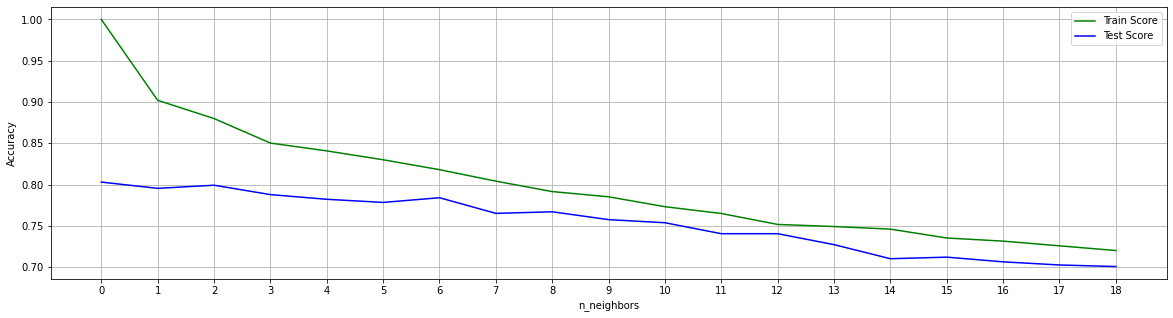

In [191]:
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
    
x_axis = range(1,20)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis, np.arange(20))
plt.grid()
plt.legend()

# Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

#Grid Search
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)
logistic_clf.fit(X_train,y_train)


In [94]:
logistic_clf.best_params_

{'C': 100, 'penalty': 'l2'}

In [228]:
LR_best = LogisticRegression(penalty = 'l2', C= 100).fit(X_train,y_train)

print('Train score: {:.4f}'.format(LR.score(X_train, y_train)))
print('Test score: {:.4f}'.format(LR.score(X_test, y_test)))

Train score: 0.9065
Test score: 0.8996


In [96]:
#Cross Validation
cvscore = cross_val_score(LR_best,X_train,y_train, cv=10)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.90566038 0.85534591 0.88679245 0.87974684 0.86708861 0.82911392
 0.86708861 0.86708861 0.92405063 0.8164557 ]
Average cross-validation scroe: 0.8698


In [199]:
#Evaluation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

logReg_test_predict = LR_best.predict(X_test)
logReg_train_predict=LR_best.predict(X_train)

print('Precision is:',precision_score(y_test,logReg_test_predict, average='micro'))
print('Recall is:',recall_score(y_test,knn_test_predict, average='micro'))

print('The Train score is:{}'.format(accuracy_score(y_train,logReg_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,logReg_test_predict)))

Precision is: 0.8996212121212122
Recall is: 0.803030303030303
The Train score is:0.9065066329753633
The Test score is:0.8996212121212122


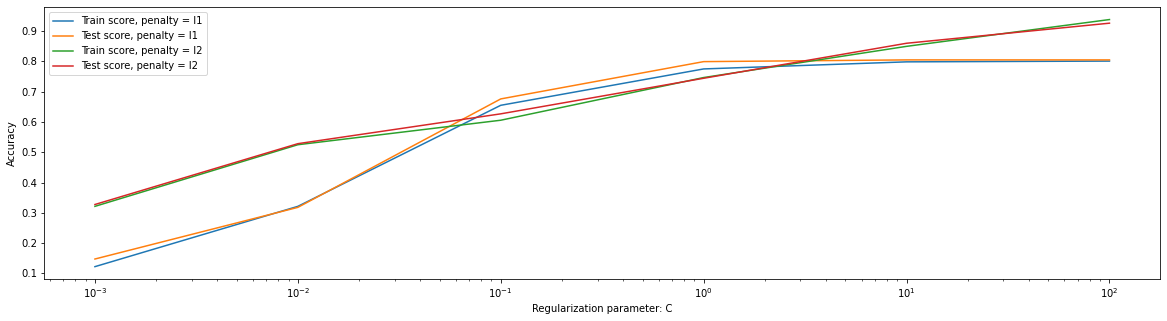

In [192]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

# Linear Support Vector Machine

In [215]:
from sklearn.svm import LinearSVC

#Grid Search
parameters = [{'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
               
lsvc_grid =GridSearchCV(estimator = lsvc_classifier,
                           param_grid = parameters,cv = 10)
lsvc_grid = lsvc_grid.fit(X_train,y_train)

In [216]:
lsvc_grid.best_params_

{'C': 10}

In [229]:
SVC = LinearSVC(C=10).fit(X_train,y_train)

print('Train score: {:.4f}'.format(SVC.score(X_train, y_train)))
print('Test score: {:.4f}'.format(SVC.score(X_test, y_test)))

Train score: 0.7764
Test score: 0.7860


In [181]:
#Cross Validation
cvscore = cross_val_score(SVC,X_train,y_train, cv=10)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.79874214 0.77987421 0.74842767 0.77848101 0.70886076 0.70253165
 0.79746835 0.74050633 0.7721519  0.71518987]
Average cross-validation score: 0.7542


In [200]:
#Evaluation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Lsvc_test_predict = SVC.predict(X_test)
Lsvc_train_predict=SVC.predict(X_train)

print('Precision is:',precision_score(y_test,Lsvc_test_predict, average='micro'))
print('Recall is:',recall_score(y_test,Lsvc_test_predict, average='micro'))

print('The Train score is:{}'.format(accuracy_score(y_train,Lsvc_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,Lsvc_test_predict)))


Precision is: 0.7840909090909091
Recall is: 0.7840909090909091
The Train score is:0.7751105495893872
The Test score is:0.7840909090909091


Text(0, 0.5, 'Accuracy')

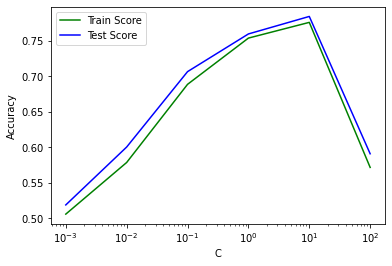

In [193]:
train_score_array = []
test_score_array = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    lsvc_classifier = LinearSVC(C=alpha, random_state=0)
    lsvc_classifier.fit(X_train, y_train)
    train_score_array.append(lsvc_classifier.score(X_train, y_train))
    test_score_array.append(lsvc_classifier.score(X_test, y_test))

plt.plot(x_range, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_array, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.xlabel('Regularization parameter: C')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')

# Kerenilzed Support Vector Machine - rbf

In [231]:
from sklearn.svm import SVC 

#Grid Search
KernelSVC = SVC(max_iter=10000)
rbf_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[10,1,0.1,0.01,0.001], 'kernel':['rbf']}
KernelSVC_clf = GridSearchCV(KernelSVC, rbf_params,cv=10)
KernelSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [232]:
KernelSVC_clf.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [233]:
kernel_rbf_best= SVC(kernel='rbf', C= 10, gamma= 0.1).fit(X_train,y_train)

print('Train score: {:.4f}'.format(kernel_rbf_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(kernel_rbf_best.score(X_test, y_test)))

Train score: 0.9311
Test score: 0.8693


In [132]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='rbf',C=10,gamma=0.1),X_train,y_train, cv=10)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.91194969 0.83647799 0.88050314 0.87341772 0.87341772 0.81012658
 0.82278481 0.87974684 0.88607595 0.86075949]
Average cross-validation score: 0.8635


In [201]:
#Evaluation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

rbf_test_predict = kernel_rbf_best.predict(X_test)
rbf_train_predict=kernel_rbf_best.predict(X_train)

print('Precision is:',precision_score(y_test,rbf_test_predict, average='micro'))
print('Recall is:',recall_score(y_test,rbf_test_predict, average='micro'))

print('The Train score is:{}'.format(accuracy_score(y_train,rbf_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,rbf_test_predict)))    

Precision is: 0.8693181818181818
Recall is: 0.8693181818181818
The Train score is:0.9311433986102338
The Test score is:0.8693181818181818


In [134]:
train_score_array = []
test_score_array = []
x_range = [0.001, 0.01, 0.1, 1, 10]

for alpha in x_range: 
    rsvc_classifier = SVC(kernel='rbf',C=alpha,gamma=0.1)
    rsvc_classifier.fit(X_train, y_train)
    train_score_array.append(rsvc_classifier.score(X_train, y_train))
    test_score_array.append(rsvc_classifier.score(X_test, y_test))

Text(0.5, 0, 'Regularization parameter: C')

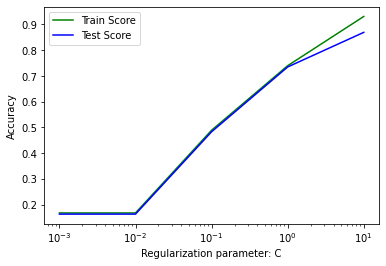

In [135]:
plt.plot(x_range, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_array, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xlabel('Regularization parameter: C')

# Kerenilzed Support Vector Machine - poly

In [221]:
from sklearn.svm import SVC

#Grid Search
KernelSVC = SVC(max_iter=10000)
poly_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[10,1,0.1,0.01,0.001], 'kernel':['poly']}
KernelSVC_clf = GridSearchCV(KernelSVC, poly_params,cv=10)
KernelSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['poly']})

In [222]:
KernelSVC_clf.best_params_

{'C': 0.001, 'gamma': 10, 'kernel': 'poly'}

In [234]:
kernel_poly_best= SVC(kernel='poly', C= 0.001, gamma= 10).fit(X_train,y_train)

print('Train score: {:.4f}'.format(kernel_poly_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(kernel_poly_best.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.9280


In [139]:
#Cross Validation
cvscore = cross_val_score(kernel_poly_best,X_train,y_train, cv=10)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.93081761 0.91823899 0.96226415 0.94936709 0.91139241 0.92405063
 0.88607595 0.94936709 0.94303797 0.90506329]
Average cross-validation score: 0.9280


In [202]:
#Evaluation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

poly_test_predict = kernel_poly_best.predict(X_test)
poly_train_predict=kernel_poly_best.predict(X_train)

print('Precision is:',precision_score(y_test,poly_test_predict, average='micro'))
print('Recall is:',recall_score(y_test,poly_test_predict, average='micro'))

print('The Train score is:{}'.format(accuracy_score(y_train,poly_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,poly_test_predict)))

Precision is: 0.928030303030303
Recall is: 0.928030303030303
The Train score is:1.0
The Test score is:0.928030303030303


In [142]:
train_score_array = []
test_score_array = []
x_range = [0.001, 0.01, 0.1, 1, 10]

for alpha in x_range: 
    psvc_classifier = SVC(kernel='poly',C=alpha,degree=1)
    psvc_classifier.fit(X_train, y_train)
    train_score_array.append(psvc_classifier.score(X_train, y_train))
    test_score_array.append(psvc_classifier.score(X_test, y_test))

Text(0.5, 0, 'Regularization parameter: C')

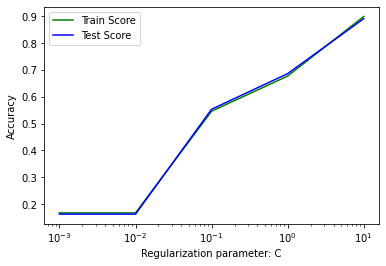

In [143]:
plt.plot(x_range, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_array, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xlabel('Regularization parameter: C')

# Kerenilzed Support Vector Machine - linear

In [209]:
from sklearn.svm import SVC 
#Grid Search
KernelSVC = SVC(max_iter=10000)
linear_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[10,1,0.1,0.01,0.001], 'kernel':['linear']}
KernelSVC_clf = GridSearchCV(KernelSVC, linear_params,cv=10)
KernelSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']})

In [210]:
KernelSVC_clf.best_params_

{'C': 10, 'gamma': 10, 'kernel': 'linear'}

In [235]:
kernel_linear_best= SVC(kernel='linear', C= 10, gamma= 10).fit(X_train,y_train)

print('Train score: {:.4f}'.format(kernel_linear_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(kernel_linear_best.score(X_test, y_test)))

Train score: 0.9495
Test score: 0.9394


In [247]:
#Cross Validation
cvscore = cross_val_score(kernel_linear_best,X_train,y_train, cv=10)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.93081761 0.9245283  0.94339623 0.93670886 0.91772152 0.90506329
 0.92405063 0.93670886 0.97468354 0.91139241]
Average cross-validation score: 0.9305


In [203]:
#Evaluation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

linear_test_predict = kernel_linear_best.predict(X_test)
linear_train_predict=kernel_linear_best.predict(X_train)

print('Precision is:',precision_score(y_test,linear_test_predict, average='micro'))
print('Recall is:',recall_score(y_test,linear_test_predict, average='micro'))

print('The Train score is:{}'.format(accuracy_score(y_train,linear_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,linear_test_predict)))

Precision is: 0.9393939393939394
Recall is: 0.9393939393939394
The Train score is:0.9494630448515476
The Test score is:0.9393939393939394


In [153]:
train_score_array = []
test_score_array = []
x_range = [0.001, 0.01, 0.1, 1, 10]

for alpha in x_range: 
    svcl_classifier = SVC(kernel='linear',C=alpha,random_state=0)
    svcl_classifier.fit(X_train, y_train)
    train_score_array.append(svcl_classifier.score(X_train, y_train))
    test_score_array.append(svcl_classifier.score(X_test, y_test))
    

Text(0.5, 0, 'Regularization parameter: C')

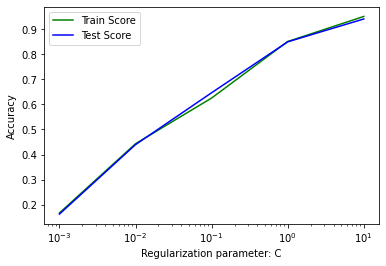

In [154]:
plt.plot(x_range, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_array, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xlabel('Regularization parameter: C')

# Decision Tree Classifier

In [224]:
from sklearn.tree import DecisionTreeClassifier

#Grid Search
dt_classifier = DecisionTreeClassifier(random_state = 0)
parameters = {'max_depth': np.arange(1, 20),'criterion':['gini','entropy']}
dtree_grid = GridSearchCV(dt_classifier, parameters, cv = 10)
dtree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [225]:
dtree_grid.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [236]:
dtree_best = DecisionTreeClassifier(max_depth=10, random_state=0, criterion= 'entropy').fit(X_train, y_train)

print('Train score: {:.4f}'.format(dtree_best.score(X_train, y_train)))
print('Test score: {:.4f}'.format(dtree_best.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.9489


In [189]:
#Cross Validation
cvscore = cross_val_score(dtree_best,X_train,y_train, cv=10)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.94968553 0.91194969 0.93710692 0.90506329 0.94303797 0.93670886
 0.94936709 0.9556962  0.93037975 0.93037975]
Average cross-validation score: 0.9349


In [205]:
#Evaluation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

dt_test_predict = dtree_best.predict(X_test)
dt_train_predict=dtree_best.predict(X_train)

print('Precision is:',precision_score(y_test,dt_test_predict, average='micro'))
print('Recall is:',recall_score(y_test,dt_test_predict, average='micro'))

print('The Train score is:{}'.format(accuracy_score(y_train,dt_train_predict)))
print('The Test score is:{}'.format(accuracy_score(y_test,dt_test_predict)))

Precision is: 0.9488636363636364
Recall is: 0.9488636363636364
The Train score is:1.0
The Test score is:0.9488636363636364


In [162]:
train_score_array = []
test_score_array = []
max_dep = np.arange(1, 20)

for depth in max_dep: 
    dt_classifier = DecisionTreeClassifier(max_depth=depth)
    dt_classifier.fit(X_train,y_train)
    train_score_array.append(dt_classifier.score(X_train,y_train))
    test_score_array.append(dt_classifier.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

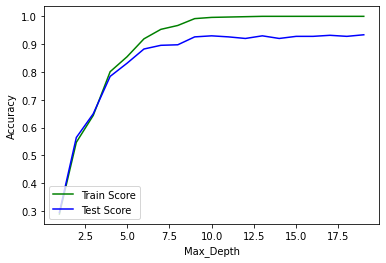

In [163]:
plt.plot(max_dep, train_score_array, c = 'g', label = 'Train Score')
plt.plot(max_dep, test_score_array, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')


# Classification Model Comparisons


In [238]:
df_index=['KNN','Logistic','Linear SVC','SVC rbf Kernel','SVC Poly Kernel','SVC Linear Kernel','Decision Tree']
Classification_Result=pd.DataFrame(columns=['Model_Name','Best_Parameter','Training_score','CV_Score','Testing_score','Precision','Recall'],index=df_index)
Classification_Result['Model_Name']=Classification_Result.index


In [239]:
### Results for KNN
Classification_Result.loc['KNN']['Best_Parameter']='K=1'
Classification_Result.loc['KNN']['Training_score']=1.0
Classification_Result.loc['KNN']['CV_Score']=0.7998
Classification_Result.loc['KNN']['Testing_score']=0.8030
Classification_Result.loc['KNN']['Precision']=0.8030
Classification_Result.loc['KNN']['Recall']=0.8030

In [240]:
### Results for Logistic Regression
Classification_Result.loc['Logistic']['Best_Parameter']='C=100, Penalty=l2'
Classification_Result.loc['Logistic']['Training_score']= 0.9065
Classification_Result.loc['Logistic']['CV_Score']=0.8698
Classification_Result.loc['Logistic']['Testing_score']= 0.8996
Classification_Result.loc['Logistic']['Precision']=0.8996
Classification_Result.loc['Logistic']['Recall']=0.8030

In [241]:
### Results for Linear SVC
Classification_Result.loc['Linear SVC']['Best_Parameter']='C=10'
Classification_Result.loc['Linear SVC']['Training_score']=0.7751
Classification_Result.loc['Linear SVC']['CV_Score']=0.7542
Classification_Result.loc['Linear SVC']['Testing_score']=0.7840
Classification_Result.loc['Linear SVC']['Precision']=0.7840
Classification_Result.loc['Linear SVC']['Recall']=0.7840

In [242]:
### Results for SVC rbf Kernel
Classification_Result.loc['SVC rbf Kernel']['Best_Parameter']='C= 10, gamma =0.1'
Classification_Result.loc['SVC rbf Kernel']['Training_score']=0.9311
Classification_Result.loc['SVC rbf Kernel']['CV_Score']=0.8635
Classification_Result.loc['SVC rbf Kernel']['Testing_score']=0.8693
Classification_Result.loc['SVC rbf Kernel']['Precision']=0.8693
Classification_Result.loc['SVC rbf Kernel']['Recall']=0.8693

In [243]:
### Results for SVC Poly Kernel
Classification_Result.loc['SVC Poly Kernel']['Best_Parameter']='C= 0.001, gamma =10'
Classification_Result.loc['SVC Poly Kernel']['Training_score']=1.0
Classification_Result.loc['SVC Poly Kernel']['CV_Score']=0.9280
Classification_Result.loc['SVC Poly Kernel']['Testing_score']=0.9280
Classification_Result.loc['SVC Poly Kernel']['Precision']=0.9280
Classification_Result.loc['SVC Poly Kernel']['Recall']=0.9280

In [244]:
### Results for SVC Linear Kernel
Classification_Result.loc['SVC Linear Kernel']['Best_Parameter']='C=10, gamma=10'
Classification_Result.loc['SVC Linear Kernel']['Training_score']=0.9494
Classification_Result.loc['SVC Linear Kernel']['CV_Score']=0.9305
Classification_Result.loc['SVC Linear Kernel']['Testing_score']=0.9393
Classification_Result.loc['SVC Linear Kernel']['Precision']=0.9393
Classification_Result.loc['SVC Linear Kernel']['Recall']=0.9393

In [245]:
### Results for Decision Tree
Classification_Result.loc['Decision Tree']['Best_Parameter']='Max_depth = 10'
Classification_Result.loc['Decision Tree']['Training_score']=1.0
Classification_Result.loc['Decision Tree']['CV_Score']=0.9349
Classification_Result.loc['Decision Tree']['Testing_score']=0.9488
Classification_Result.loc['Decision Tree']['Precision']=0.9488
Classification_Result.loc['Decision Tree']['Recall']=0.9488

In [246]:
Classification_Result

,Model_Name,Best_Parameter,Training_score,CV_Score,Testing_score,Precision,Recall
KNN,KNN,K=1,1,0.7998,0.803,0.803,0.803
Logistic,Logistic,"C=100, Penalty=l2",0.9065,0.8698,0.8996,0.8996,0.803
Linear SVC,Linear SVC,C=10,0.7751,0.7542,0.784,0.784,0.784
SVC rbf Kernel,SVC rbf Kernel,"C= 10, gamma =0.1",0.9311,0.8635,0.8693,0.8693,0.8693
SVC Poly Kernel,SVC Poly Kernel,"C= 0.001, gamma =10",1,0.928,0.928,0.928,0.928
SVC Linear Kernel,SVC Linear Kernel,"C=10, gamma=10",0.9494,0.9305,0.9393,0.9393,0.9393
Decision Tree,Decision Tree,Max_depth = 10,1,0.9349,0.9488,0.9488,0.9488


# Decision Tree Classifier is the best classification because it has the highest Accuracy score, Precision score and Recall score.

In [250]:
X_full_data = scaler.fit_transform(X)
X_full_data = pd.DataFrame(X_full_data, columns= X.columns)
X_full_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,0.148936,0.320755,0.186567,0.0,1.0,0.5,0.666667,1.0,0.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.148936,0.132075,0.126866,0.0,1.0,1.0,0.666667,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.191489,0.660377,0.283582,0.0,1.0,0.5,0.666667,1.0,0.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.276596,0.660377,0.358209,1.0,1.0,1.0,0.666667,1.0,0.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.170213,0.622642,0.379104,1.0,1.0,0.5,0.000000,1.0,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [251]:
dtree_best = DecisionTreeClassifier(max_depth=10, random_state=0, criterion= 'entropy').fit(X_full_data, y)

print('Train score: {:.4f}'.format(dtree_best.score(X_full_data, y)))
print('Test score: {:.4f}'.format(dtree_best.score(X_full_data, y)))

Train score: 1.0000
Test score: 1.0000


In [254]:
#Predicting the Target variable
pred_values= dtree_best.predict(X_test)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True).rename(columns={'NObesity':'Actual Obesity Level'})
pred_values_df= pd.DataFrame(pred_values).rename(columns={0:'Predicted Obesity Level'}).astype('int64')
pred_test_dtree_df = pd.concat([pred_values_df, y_test_df], axis=1)
pred_test_dtree_df.head(20)


,Predicted Obesity Level,Actual Obesity Level
0,3,3
1,2,2
2,5,5
3,4,4
4,4,4
5,3,3
6,0,0
7,4,4
8,2,2
9,3,3


In [256]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Precision is:',precision_score(y_test,pred_values, average='micro'))
print('Recall is:',recall_score(y_test,pred_values, average='micro'))


Precision is: 0.9981060606060606
Recall is: 0.9981060606060606
